In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH_Train = '/content/drive/My Drive/Colab Notebooks/ML_proj/featured_train.csv'
DATA_PATH_Test = '/content/drive/My Drive/Colab Notebooks/ML_proj/featured_test.csv'
DATA_PATH_DEV = '/content/drive/My Drive/Colab Notebooks/ML_proj/featured_dev.csv'


In [ ]:
import pandas as pd

train = pd.read_csv(DATA_PATH_Train)
test = pd.read_csv(DATA_PATH_Test)
dev = pd.read_csv(DATA_PATH_DEV)

In [ ]:
train = train.drop(columns=["Unnamed: 0"])
test = test.drop(columns=["Unnamed: 0"])
dev = dev.drop(columns=["Unnamed: 0"])

In [ ]:
X_train = train.iloc[:, 7:]
y_train = train['class'].astype(int)

X_test = test.iloc[:, 7:]
y_test = test['class'].astype(int)

X_dev = dev.iloc[:, 7:]
y_dev = dev['class'].astype(int)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_dev.shape)

(19826, 10049)
(2479, 10049)
(2478, 10049)


In [ ]:
print(X_dev)

       00  000   02  0221  0sbaby4life   10  100  1000  100k  100s  ...  \
0     0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
1     0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
2     0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
3     0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
4     0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
...   ...  ...  ...   ...          ...  ...  ...   ...   ...   ...  ...   
2473  0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
2474  0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
2475  0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
2476  0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   
2477  0.0  0.0  0.0   0.0          0.0  0.0  0.0   0.0   0.0   0.0  ...   

      length  count_chars  count_terms  count_unique_terms  count_words  \
0      109.0        109.

### Preprocessing

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(0.00001)
x_train = selector.fit_transform(X_train)
print(x_train.shape)

ind = [ i for i, f in enumerate(selector.get_support()) if f ]
x_dev = X_dev.iloc[:, ind]
x_test = X_test.iloc[:, ind]
print(x_dev.shape)
print(x_test.shape)

(19826, 8959)
(2478, 8959)
(2479, 8959)


### Running AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(random_state=42)
clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
y_preds = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import classification_report
report = classification_report( y_test, y_preds )

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.42      0.19      0.26       118
           1       0.94      0.93      0.93      1937
           2       0.74      0.88      0.80       424

    accuracy                           0.88      2479
   macro avg       0.70      0.66      0.66      2479
weighted avg       0.88      0.88      0.88      2479



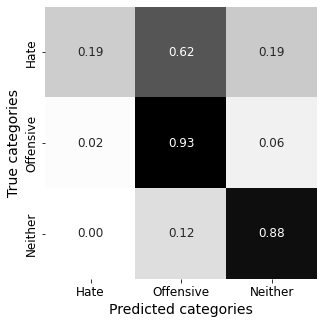

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

### AdaBoost clasifier with different parameters

In [ ]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=42)
clf2.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_preds2 = clf2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
report = classification_report( y_test, y_preds2 )
print(report)

              precision    recall  f1-score   support

           0       0.43      0.25      0.31       118
           1       0.94      0.94      0.94      1937
           2       0.78      0.88      0.83       424

    accuracy                           0.89      2479
   macro avg       0.72      0.69      0.69      2479
weighted avg       0.89      0.89      0.89      2479



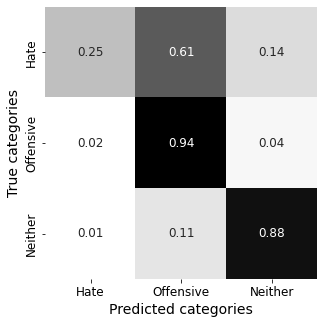

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_preds2)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix2[i,:]/float(confusion_matrix2[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)